In [1]:
import pandas as pd

from google.colab import auth
auth.authenticate_user()

In [40]:
project_id = 'idyllic-creek-308203'
sql ='''
SELECT CUST_CODE, 
SUM(SPEND) AS TOTAL_SALES, 
COUNT(DISTINCT BASKET_ID) AS TOTAL_VISIT 
FROM `idyllic-creek-308203.BAD7105.supermarket`
WHERE CUST_CODE IS NOT NULL 
GROUP BY CUST_CODE'''
df = pd.io.gbq.read_gbq(sql , project_id=project_id, verbose=False, dialect="standard")

In [41]:
df.head(5)

,CUST_CODE,TOTAL_SALES,TOTAL_VISIT
0,CUST0000065412,275.26,15
1,CUST0000644893,3726.78,154
2,CUST0000863361,190.79,32
3,CUST0000543374,915.17,33
4,CUST0000063931,1478.05,124


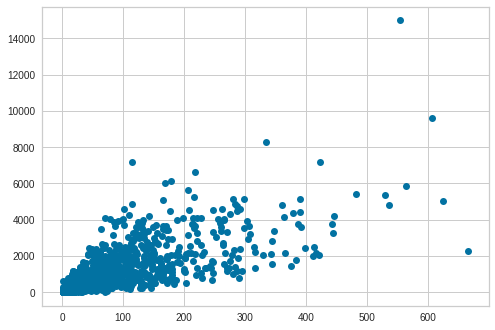

In [42]:
import matplotlib.pyplot as plt
plt.plot(df['TOTAL_VISIT'], df['TOTAL_SALES'], "o")

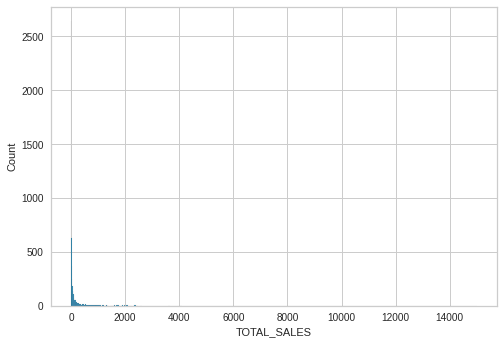

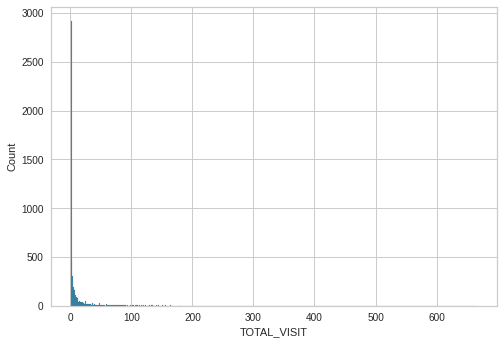

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, col in enumerate(df.columns[1:]):
    plt.figure(i)
    sns.histplot(df[col])
    
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
df_std = pd.DataFrame(StandardScaler().fit_transform(df[df.columns[1:]]))
df_std.head(5)

,0,1
0,0.041476,-0.098176
1,4.940437,2.615287
2,-0.078417,0.233686
3,0.949741,0.253208
4,1.748672,2.029647


In [52]:
from sklearn.cluster import KMeans
model_cluster = KMeans(n_clusters=7)
df['cluster'] = model_cluster.fit_predict(df_std)
df.cluster.value_counts()

0    5007
2     573
5     273
3     122
1      63
6      52
4      10
Name: cluster, dtype: int64

In [53]:
print(model_cluster.cluster_centers_)

[[-0.29891026 -0.31194811]
 [ 2.1863741   4.91384483]
 [ 0.33199362  0.36281406]
 [ 3.60458186  1.84643511]
 [ 9.41752622  9.99044117]
 [ 1.23492257  1.69964424]
 [ 5.74737457  4.93532066]]


In [54]:
print(model_cluster.labels_)

[0 3 2 ... 0 0 0]


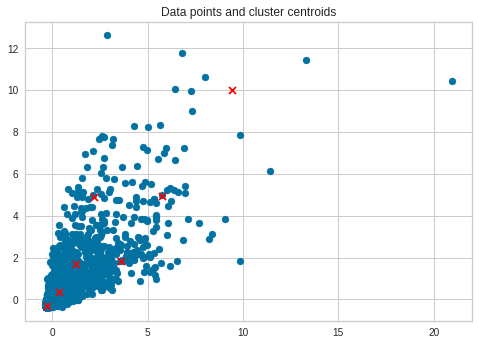

In [55]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(df_std[0], df_std[1])
    
plt.scatter(model_cluster.cluster_centers_[:, 0], model_cluster.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

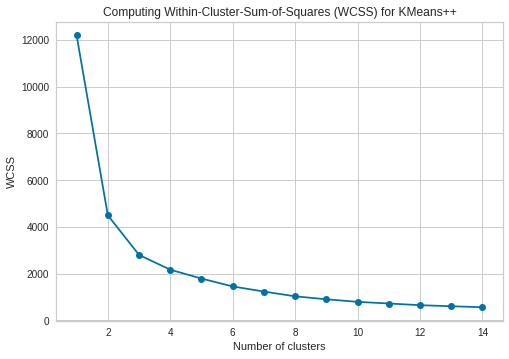

In [78]:
from sklearn.cluster import KMeans
# Use the Elbow method to find a good number of clusters using Within-Cluster-Sum-of-Squares (WCSS)
wcss = []
N = range(1, 15)
for i in N:
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit_predict(df_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(N, wcss, 'bo-')
plt.title("Computing Within-Cluster-Sum-of-Squares (WCSS) for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

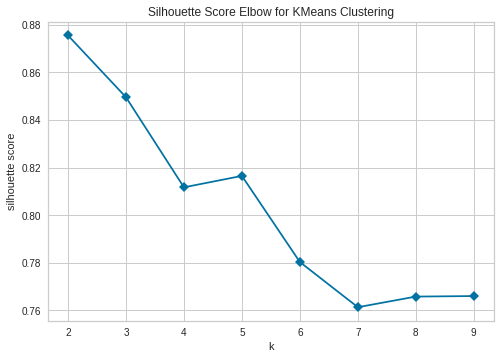

In [60]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model_cluster, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(df_std)    
visualizer.poof()  

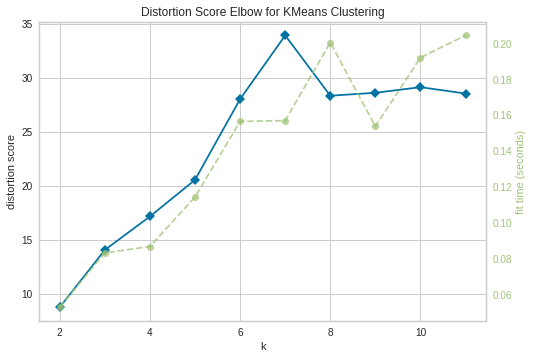

In [77]:
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(model_cluster, k=11)
model.fit(df_std)
model.poof()   